In [ ]:
#TODO : Install Required Libraries
!pip install biopython
#TODO : Create random sequence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.0 MB/s eta 0:00:00


In [ ]:
from Bio.Seq import Seq

seq1 = Seq("CAGTCAT")
seq2 = Seq("CGTAT")
print(seq1)
print(seq2)

CAGTCAT
CGTAT


In [ ]:
# package pairwise2 -> untuk check alignmetn global atau lokal

In [ ]:
#A Alignments
  # Sequence 1 : A C T C G
  # Sequence 2 : A T T C _

  # A-A, T-T, C-C -> Match
  # C-T -> Mismatch
  # G- _ -> Gap
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
#1. Global Alignment
g_align = pairwise2.align.globalxx(seq1, seq2)
print(g_align)

for align in g_align:
  print(format_alignment(*align)) #mendisplay smeua kemungkinan yang ada

[Alignment(seqA='CAGTCAT', seqB='C-GT-AT', score=5.0, start=0, end=7)]
CAGTCAT
| || ||
C-GT-AT
  Score=5



In [ ]:
#2. Local Alignment
l_align = pairwise2.align.localxx(seq1, seq2)
print(l_align)

print("Seq1 = ", seq1)
for align in l_align:
  print(format_alignment(*align))

[Alignment(seqA='CAGTCAT', seqB='C-GT-AT', score=5.0, start=0, end=7)]
Seq1 =  CAGTCAT
CAGTCAT
| || ||
C-GT-AT
  Score=5



In [ ]:
#B. Similarity (using alignment)
#TODO : use global alignment, but only obtain the one alignment score only
g_score = pairwise2.align.globalxx(seq1, seq2,
                  one_alignment_only=True, score_only=True)
g_similarity = g_score / len(seq1) * 100
print("Global Similarity = ", g_similarity)

#TODO : use lokal alignment, but only obtain the one alignment score only
l_score = pairwise2.align.localxx(seq1, seq2,
                  one_alignment_only=True, score_only=True)
l_similarity = l_score / len(seq1) * 100
print("GLokal Similarity = ", l_similarity)

Global Similarity =  71.42857142857143
GLokal Similarity =  71.42857142857143


In [ ]:
# Example Case :
# Find out all the possible global alignments
# with the maximum similarity score
# Matching characters : 2 points
# Each Mismatching character : -1 point
# 0.5 points are deducated when opening a gap
# 0.1 points are deducted when extending it
seqX = Seq("CAGTCATACCT")
seqY = Seq("CAGATAAGCTG")

alignment = pairwise2.align.globalms(seqX, seqY, 2, -1, -0.5, -0.1)
print(alignment)

for align in alignment:
  print(format_alignment(*align))

[Alignment(seqA='CAGTCATAC--CT-', seqB='CAG--ATA-AGCTG', score=13.8, start=0, end=14), Alignment(seqA='CAGTCATA--CCT-', seqB='CAG--ATAAGC-TG', score=13.8, start=0, end=14)]
CAGTCATAC--CT-
|||  |||   || 
CAG--ATA-AGCTG
  Score=13.8

CAGTCATA--CCT-
|||  |||  | | 
CAG--ATAAGC-TG
  Score=13.8



In [ ]:
#Distance

#1. Hamming Distance
def hammingDistance(seqX, seqY):
  data = [(x,y) for x, y in zip(seqX, seqY) if x != y]

  return len(data) #Bisa diubah dnegan prin(data) nanti outputnya berupa string dari padangan yang mismatch
hammingDistance(seqX, seqY)

6

In [ ]:
#Perfom Hamming distance calculation
print("Seq X  : ", seqX)
print("Seq Y  : ", seqY)
hammingDistance(seqX, seqY)

Seq X  :  CAGTCATACCT
Seq Y  :  CAGATAAGCTG


6

In [ ]:
#TODO : Install required modules
!pip install python-levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.5 MB/s eta 0:00:00


In [ ]:
#2. Levenshtein Distance
from Levenshtein import distance

print("Seq X  : ", seqX)
print("Seq Y  : ", seqY)
# print(distance("PARTY", "PARK")) #ouput = 2
print(distance(seqX, seqY)) #output = 5

Seq X  :  CAGTCATACCT
Seq Y  :  CAGATAAGCTG
5


In [ ]:
#3. Dots plot

#TODO : install all required modules
# 1. numpy for matrix calculation
# 2. matplotlib for visualization

!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Function
def check(x, y):
   # if x == y:
  #   return 0
  # else:
  #   return 1
  return 0 if x == y else 1


def makeMatrix(seq1, seq2):
   len_1 = len(seq1)
   len_2 = len(seq2)
   return [
       [check(seq1[i], seq1[j]) for j in range(len_2)]
    for i in range(len_1)]


  # for i in range(len_1):
  #   for j in range(len_2):
  #     do something


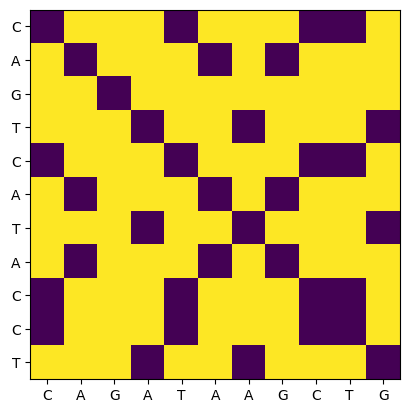

In [ ]:
#GUI
import matplotlib.pyplot as plt
import numpy
res = makeMatrix(seqX, seqY)
dotplot = plt.imshow(numpy.array(res))
x_axis = plt.xticks(numpy.arange(len(seqY)), list(seqY))
y_axis = plt.yticks(numpy.arange(len(seqX)), list(seqX))
plt.show()